# Experimentos sobre modelo Barabási

In [1]:
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy

from noisy_graph import NoisyGraph
from networkx.algorithms import centrality
from scipy.stats import wasserstein_distance

Construcción de grafo ruidoso a partir de grafo de Barábasi-Albert

In [2]:
# experimental setup
seed = 200494
random.seed(seed)
numpy.random.seed(seed)

# original graph
n = 500
m = 20
ftrp = 0.20
graph = nx.barabasi_albert_graph(n=n, m=m, seed=seed)

# noisy graph
noisy_graph = NoisyGraph(ftrp=ftrp)

# construction
for node in graph.nodes:
    neighbors = list(graph.neighbors(node))
    noisy_graph.add_node_with_neighbors(node, neighbors)

Histograma de $\sigma_i$

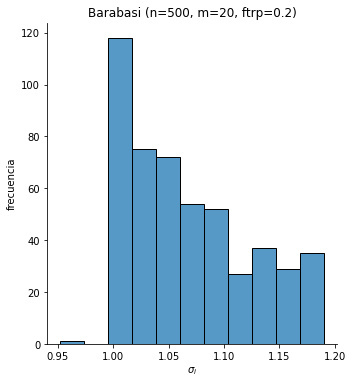

In [3]:
n_sigmas = noisy_graph.get_graph_sigmas()
sns.displot(n_sigmas)
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel(r'$\sigma_i$')
plt.ylabel('frecuencia');

Obtención de incertidumbre

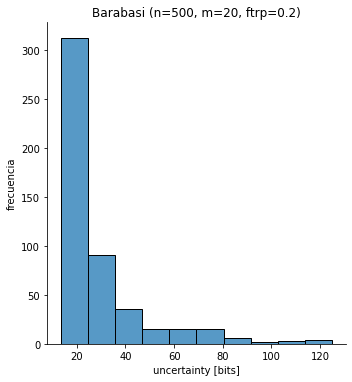

In [4]:
node_uncertainties = noisy_graph.node_uncertainties()
sns.displot(node_uncertainties, bins=10)
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel('uncertainty [bits]')
plt.ylabel('frecuencia');

In [5]:
mean, std_dev, minimum, maximum = noisy_graph.uncertainty_profile()
profile = {"mean": mean, "std_dev": std_dev, "min": minimum, "max": maximum}
profile

{'mean': 28.361756216081975,
 'std_dev': 19.147049639923193,
 'min': 13.37531099747307,
 'max': 124.9842470684648}

Obtención de métricas de centralidad

In [6]:
# métricas de grafo original
normal_degree_centrality = centrality.degree_centrality(graph)

# métricas de grafo perturbado
noisy_graph = nx.Graph(noisy_graph.edges())
noisy_degree_centrality = centrality.degree_centrality(noisy_graph)

In [7]:
# creando dataframe
normal_df = pd.DataFrame(normal_degree_centrality.values(), columns=['degree'])
normal_df['graph'] = "original"

noisy_df = pd.DataFrame(noisy_degree_centrality.values(), columns=['degree'])
noisy_df['graph'] = "noisy"

degree_df = normal_df.append(noisy_df)

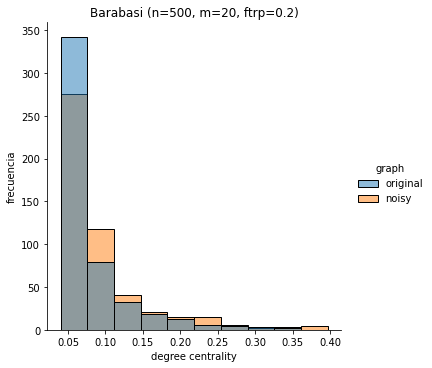

In [8]:
# generando histogramas de centralidad
sns.displot(data=degree_df, x="degree", hue="graph", bins=10)
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel('degree centrality')
plt.ylabel('frecuencia');

In [9]:
w_distance= wasserstein_distance(list(normal_degree_centrality.values()),
                                 list(noisy_degree_centrality.values()))

print(f"Wasserstein distance: {w_distance:.4f}")

Wasserstein distance: 0.0162


In [10]:
def sorted_nodes(dictionary):
    items = list(dictionary.items())
    items.sort(key=lambda element: (element[1], element[0]))
    nodes = [item[0] for item in items]
    return nodes

In [11]:
normal_centrality_nodes = sorted_nodes(normal_degree_centrality)
noisy_centrality_nodes = sorted_nodes(noisy_degree_centrality)

count = 0
deltas = []
for i in range(len(normal_centrality_nodes)):
    if normal_centrality_nodes[i] != noisy_centrality_nodes[i]:
        deltas.append((i, normal_centrality_nodes[i], noisy_centrality_nodes[i]))
        count += 1

print(f"Node count: {count}")

Node count: 36


In [12]:
for delta in deltas:
    print(delta)

(38, 331, 496)
(39, 359, 331)
(40, 368, 359)
(41, 375, 368)
(42, 388, 375)
(43, 398, 388)
(44, 409, 398)
(45, 410, 409)
(46, 411, 410)
(47, 417, 411)
(48, 419, 417)
(49, 431, 419)
(50, 434, 431)
(51, 438, 434)
(52, 439, 438)
(53, 445, 439)
(54, 446, 445)
(55, 448, 446)
(56, 450, 448)
(57, 451, 450)
(58, 453, 451)
(59, 455, 453)
(60, 456, 455)
(61, 457, 456)
(62, 458, 457)
(63, 459, 458)
(64, 461, 459)
(65, 463, 461)
(66, 465, 463)
(67, 467, 465)
(68, 469, 467)
(69, 476, 469)
(70, 477, 476)
(71, 479, 477)
(72, 481, 479)
(73, 496, 481)
